These are the final graphs:
Constant step size converges faster that with Diminishing step size. Then the Synchronous algorithm is faster than regular Q learning. Then for the behavior policies: Boltzmann policy was the fastest, then uniform, then epsilon greedy.

# Gamma = 0.95

## Constant Step Size

In [ ]:
self.QFunction = np.array([[13.23176522, 13.33925622, 14.05469772], [13.52671959, 13.1224803,  13.22367197], [13.30159516, 13.86810447, 13.51346527], [13.66552722, 13.47151662, 13.23704243], [14.00228974, 13.41027839, 13.44004462], [13.42221627, 13.84567785, 13.56730379], [13.17987508, 13.49701082, 13.59308849], [13.24370111, 13.86450877, 13.89669707], [13.86681663, 13.87073118, 13.73493382], [13.24989143, 13.5198381,  13.37349781]])

## Epsilon Greedy

0
100000
200000
300000
400000
500000
600000
700000
0.3806625750590966
--- 70.41531801223755 seconds ---


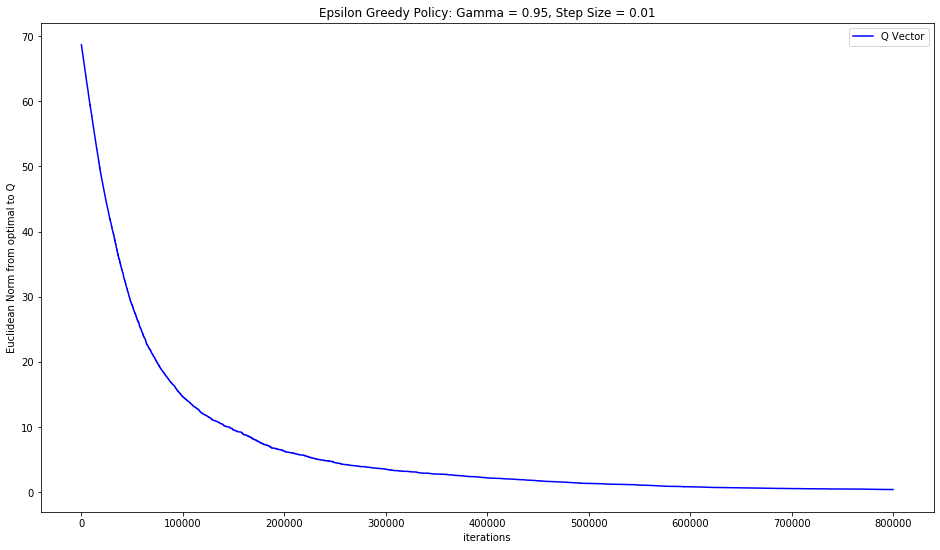

In [25]:
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
import mdptoolbox.example
import numpy as np
import sys
import time
import time
import timeit
import warnings
warnings.filterwarnings('ignore')
'''
Class MarkovDP contains the following attributes:
1)Number of states  : s
2)Number of actions : a
3)State Space
4)Action Space
5)Transition probability matrix of size (a,s,s)
6)Reward matrix (a,s,s)
'''
############ https://github.com/gt-coar/NesaraREU20/blob/master/Value_Iteration.ipynb #############
class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        #print(rewards)
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.transitions, self.rewards         = mdptoolbox.example.rand(self.num_state,self.num_action)
        self.rewards                           = np.random.rand(self.num_action, self.num_state) #, self.num_state) #,self.num_state)

        
#having a min epsilon of 0.1 makes sure that no matter what there is some exploration so that if the epsilon decays too fast the enviornment is not dependent on its previous knowledge
class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 800000, max_steps = 1,min_alpha=0.0, min_epsilon= 0.1, epsilon = 1.00, gamma = 0.95, decay = 25, solved=False):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        self.decay = decay  #works for most numbers between 5 and 35
        self.env = env #gym.make('CartPole-v0')
        self.QTable = np.ones((env.num_state, env.num_action))
        self.zeros = np.full((10,3), 0)
        self.QFunction = np.array([[13.23176522, 13.33925622, 14.05469772], [13.52671959, 13.1224803,  13.22367197], [13.30159516, 13.86810447, 13.51346527], [13.66552722, 13.47151662, 13.23704243], [14.00228974, 13.41027839, 13.44004462], [13.42221627, 13.84567785, 13.56730379], [13.17987508, 13.49701082, 13.59308849], [13.24370111, 13.86450877, 13.89669707], [13.86681663, 13.87073118, 13.73493382], [13.24989143, 13.5198381,  13.37349781]])        
        
    def action(self, state, epsilon):
        ''' choose an action using the epsilon policy '''
        if np.random.random() <= epsilon:
            action = random.choice(self.env.actions)
            action = list(self.env.actions).index(action)
        else:
            action = np.argmax(self.QTable[state])  # exploitation
        return action

    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
    def learning(self):
        QList = []
        QLog = []
        state = np.random.randint(0, self.env.num_state)
        tt=0
        r = 0
        q = 0
        for e in range(self.max_episodes):  
            if e % 100000 == 0:
                print(e)
            epsilon = self.decay_epsilon() #e)
            step_size = 0.01 #self.decay_step_size(e)
            action = self.action(state, epsilon)
            transitionVector = self.env.transitions[action][state]
            new_state = random.choices(population=self.env.states, weights=list(transitionVector))
            new_state = new_state[0]
            reward = self.env.rewards[action][state]
            self.Q_Update(state, action, reward, new_state, step_size)
            state = new_state
            QList.append(np.linalg.norm(self.QTable - self.QFunction))
            QLog.append(math.log10(np.linalg.norm(self.QTable - self.QFunction)))
        return QList, QLog
    

if __name__ == '__main__':
    ''' Run main program. '''
    start_time = time.time()
    env = MarkovDP(10,3)
    env.initialize_mdp()
    solve = Qlearning(env)#MarkovDP)
    QList, QLog = solve.learning()
    print(min(QList))
    print("--- %s seconds ---" % (time.time() - start_time))
    fig = plt.figure(figsize=(16,9))
    """ax1 = fig.add_subplot(311)
    ax1.plot(epsilon,  # epsilon_hist,
             color='b',
             label='Epsilon')
    ax1.set(title='Epsilon Plot',
            ylabel='Epsilon',
            xlabel='episodes')"""
    ax2 = fig.add_subplot(111)
    ax2.plot(QList,  # epsilon_hist,
             color='b',
             label='Q Vector')
    ax2.set(title='Epsilon Greedy Policy: Gamma = 0.95, Step Size = 0.01', 
            ylabel='Euclidean Norm from optimal to Q',
            xlabel='iterations')
    """ax3 = fig.add_subplot(313)
    ax3.plot(rewards,  # epsilon_hist,
             color='b',
             label='rewards')
    ax3.set(title='10x3 MDP',
            ylabel='Rewards',
            xlabel='episodes')"""
    fig.subplots_adjust(hspace=0.7)
    #ax1.legend(loc='best')
    ax2.legend(loc='best')
    #ax3.legend(loc='best')

    plt.show()

In [ ]:
Converged after 700000 iterations

# BP

0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
[[13.24573927 13.32863208 14.06396152]
 [13.52773494 13.1379854  13.23308262]
 [13.31468734 13.87578194 13.53168162]
 [13.68112763 13.48437518 13.24870774]
 [14.01216442 13.41298378 13.44848981]
 [13.40726854 13.86227779 13.56545202]
 [13.20112857 13.51179225 13.58501437]
 [13.23761555 13.87137842 13.90266436]
 [13.87873442 13.86587167 13.74359463]
 [13.25690512 13.53255859 13.38756228]]
0.03251506402414687


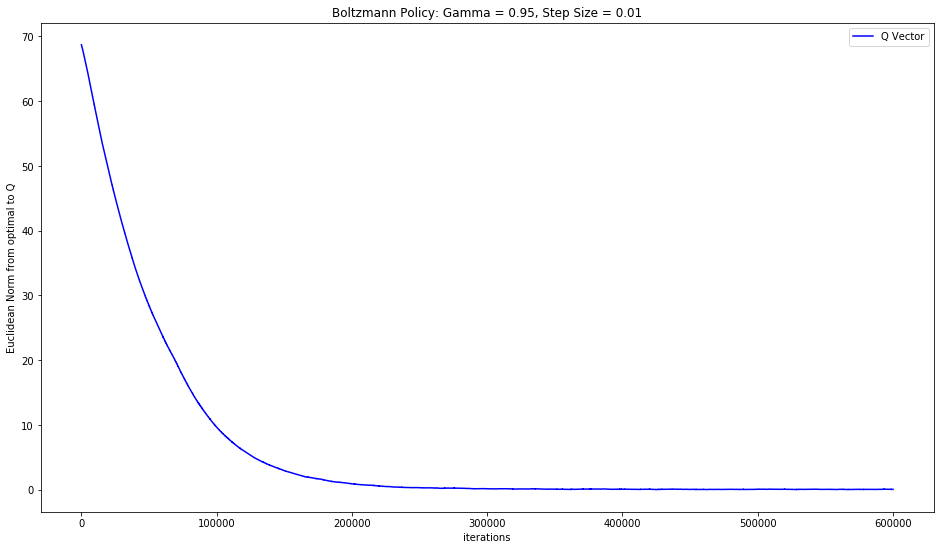

In [20]:
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
import mdptoolbox.example
import numpy as np
import sys
import time
import timeit
import warnings
warnings.filterwarnings('ignore')
'''
Class MarkovDP contains the following attributes:
1)Number of states  : s
2)Number of actions : a
3)State Space
4)Action Space
5)Transition probability matrix of size (a,s,s)
6)Reward matrix (a,s,s)
'''
######## https://github.com/gt-coar/NesaraREU20/blob/master/Value_Iteration.ipynb ##########
class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.transitions, self.rewards         = mdptoolbox.example.rand(self.num_state,self.num_action)
        self.rewards                           = np.random.rand(self.num_action, self.num_state) #   ( self.num_state,self.num_state)        #print(self.rewards)

        
class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 600000, max_steps = 1,min_alpha=0.1, min_epsilon=0.1, epsilon = 1.0, gamma = 0.95, decay = 25, solved=False):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 0.9 # learning rate parameter
        self.beta = 0.55 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        #self.states = MarkovDP.states
        #self.actions = MarkovDP.actions
        self.decay = decay  #works for most numbers between 5 and 35
        self.env = env #gym.make('CartPole-v0')
        self.QTable = np.ones((env.num_state, env.num_action))
        self.QFunction = np.array([[13.23176522, 13.33925622, 14.05469772], [13.52671959, 13.1224803,  13.22367197], [13.30159516, 13.86810447, 13.51346527], [13.66552722, 13.47151662, 13.23704243], [14.00228974, 13.41027839, 13.44004462], [13.42221627, 13.84567785, 13.56730379], [13.17987508, 13.49701082, 13.59308849], [13.24370111, 13.86450877, 13.89669707], [13.86681663, 13.87073118, 13.73493382], [13.24989143, 13.5198381,  13.37349781]])       
        self.tau = 100000    # tau --> 0 pure exploitation tau --> infinity pure exploration
        self.tau_decay = True
        self.decay_factor_tau = 1.5 
        self.zeros = np.full((10,3), 0)
    
    def Boltzmann(self, state, tau):
        qList = self.QTable[state] #moves = self.q_matrix[pos_index]
        self.actions = [i for i in range(0, self.env.num_action)]
        if self.tau > 0.0:
            action_probs_numes = []
            denom = 0
            for q in qList:
                val = math.exp(q / self.tau)
                action_probs_numes.append(val)
                denom += val  # summation of the values
            action_probs = []
            for x in action_probs_numes:
                probs = x / denom 
                action_probs.append(probs)    
            prob_sum = 0
            action = random.choices(self.actions, weights=action_probs, k=1)[0] # the weights give a weight to correspond 
        else:
            action = np.argmax(self.QTable[state])
        return action
    
    
    def action_policy(self, state, policy):
        return policy[state]

    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        # self.QTable[old_state][action] += alpha * (reward + self.gamma * np.max(self.Q[state_new]) - self.Q[state_old][action])
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
    
    def decay_tau(self, t):          
        if self.tau_decay is True:
            #print(t)
            new_tau = self.tau - self.decay_factor_tau
        if new_tau < 1.0:
            self.tau = 1.0
        else:
            self.tau = new_tau
        return new_tau 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
    def learning(self):
        rewards = []
        alphaList = []
        epsilonList = []
        QList = []
        tt=0
        state = np.random.randint(0,9) #self.env.reset()
        r=0
        q=0
        for e in range(self.max_episodes):  
            if e % 50000 == 0:
                print(e)
            epsilon = self.decay_tau(e)
            step_size = 0.01 #self.decay_step_size(tt, e, t)
            tt+=1
            action = self.Boltzmann(state, epsilon)
            transitionVector = self.env.transitions[action][state]
            new_state = random.choices(population=self.env.states, weights=list(transitionVector))
            new_state = new_state[0]
            reward = self.env.rewards[action][state]
            self.Q_Update(state, action, reward, new_state, step_size)
            state = new_state
            i = 0
            QList.append(np.linalg.norm(self.QTable-self.QFunction))
            alphaList.append(step_size)
            epsilonList.append(epsilon)
            mean_rewards =  np.mean(rewards)
        return rewards, alphaList, epsilonList, QList
    
if __name__ == '__main__':
    ''' Run main program. '''
    env = MarkovDP(10,3)
    env.initialize_mdp()
    solve = Qlearning(env)#MarkovDP)
    rewards, alpha, epsilon, QList = solve.learning()
    print(min(QList))
    fig = plt.figure(figsize=(16,9))
    """ax1 = fig.add_subplot(311)
    ax1.plot(epsilon,  # epsilon_hist,
             color='b',
             label='Tau')
    ax1.set(title='Tau Plot',
            ylabel='Tau',
            xlabel='episodes')"""
    ax2 = fig.add_subplot(111)
    ax2.plot(QList,  # epsilon_hist,
             color='b',
             label='Q Vector')
    ax2.set(title='Boltzmann Policy: Gamma = 0.95, Step Size = 0.01',
            ylabel='Euclidean Norm from optimal to Q',
            xlabel='iterations')
    """ax3 = fig.add_subplot(313)
    ax3.plot(rewards,  # epsilon_hist,
             color='b',
             label='rewards')
    ax3.set(title='10x3 MDP',
            ylabel='Rewards',
            xlabel='episodes')
    fig.subplots_adjust(hspace=0.7)
    ax1.legend(loc='best')"""
    ax2.legend(loc='best')
    #ax3.legend(loc='best')
    plt.show()

In [ ]:
converged after 200000 iterations

# UP

0
100000
200000
300000
[[13.2315636  13.33219415 14.06063838]
 [13.53167169 13.13684366 13.22918218]
 [13.30261464 13.88094201 13.49997116]
 [13.66259422 13.46938511 13.24254821]
 [14.00349873 13.39683185 13.43833628]
 [13.41270067 13.82611711 13.57330631]
 [13.17396695 13.50029749 13.61168106]
 [13.25396076 13.87145508 13.90246405]
 [13.88458181 13.85844276 13.72911103]
 [13.25440913 13.51369417 13.37204358]]
0.047476306112998586
--- 19.56725287437439 seconds ---


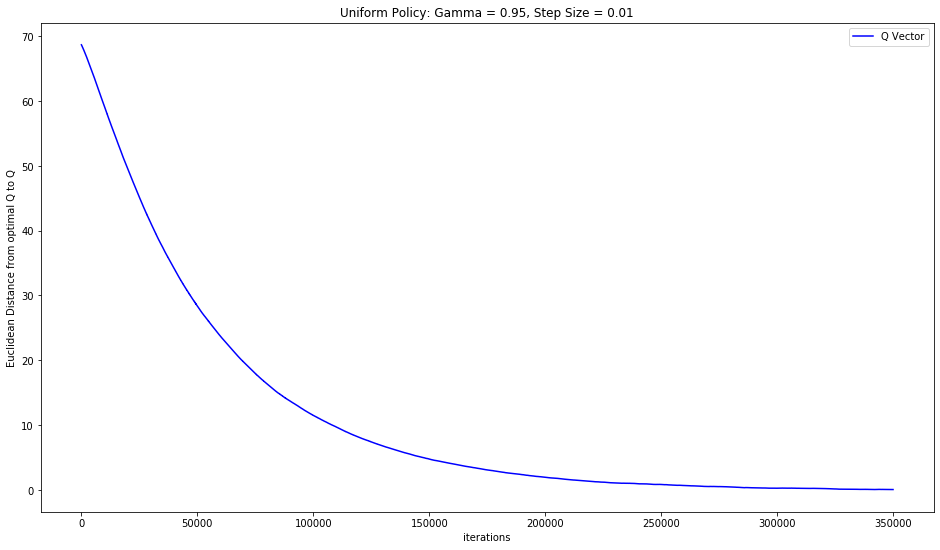

In [29]:
### initialized with random values:
#When initialized with random values it does not converge all the time, but a fair amount of the time

import gym
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
#env= MarkovDP(10,3)      #Define an MDP Environment : Insantiate Class
#env.initialize_mdp()    #Define P and R
import mdptoolbox.example
import numpy as np
import sys
import time
import time
import timeit
import warnings
warnings.filterwarnings('ignore')
'''
Class MarkovDP contains the following attributes:
1)Number of states  : s
2)Number of actions : a
3)State Space
4)Action Space
5)Transition probability matrix of size (a,s,s)
6)Reward matrix (a,s,s)
'''
class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        #print(rewards)
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.transitions, self.rewards         = mdptoolbox.example.rand(self.num_state,self.num_action)
        self.rewards                           = np.random.rand(self.num_action, self.num_state) #   ( self.num_state,self.num_state)


class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 350000, max_steps = 1,min_alpha=0.0, min_epsilon= 0.1, epsilon = 1.00, gamma = 0.95, decay = 25, solved=False):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        self.decay = decay  #works for most numbers between 5 and 35
        self.env = env #gym.make('CartPole-v0')
        self.QTable = np.ones((env.num_state, env.num_action))
        self.zeros = np.full((10,3), 0)
        self.QFunction = np.array([[13.23176522, 13.33925622, 14.05469772], [13.52671959, 13.1224803,  13.22367197], [13.30159516, 13.86810447, 13.51346527], [13.66552722, 13.47151662, 13.23704243], [14.00228974, 13.41027839, 13.44004462], [13.42221627, 13.84567785, 13.56730379], [13.17987508, 13.49701082, 13.59308849], [13.24370111, 13.86450877, 13.89669707], [13.86681663, 13.87073118, 13.73493382], [13.24989143, 13.5198381,  13.37349781]])        
        
    def action(self, state):
        ''' choose an action using the epsilon policy '''
        action = random.choice(self.env.actions)
        action = list(self.env.actions).index(action)
        return action

    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
#1-ln(time unit/decay)
    def learning(self):
        rewards = []
        alphaList = []
        epsilonList = []
        QList = []
        state = np.random.randint(0, self.env.num_state)
        tt=0
        r = 0
        q = 0
        for e in range(self.max_episodes):  
            if e % 100000 == 0:
                print(e)
             #self.env.reset()
            step_size = 0.01 #self.decay_step_size(e)
            action = self.action(state)
            transitionVector = self.env.transitions[action][state]
            new_state = random.choices(population=self.env.states, weights=list(transitionVector))
            new_state = new_state[0]
            reward = self.env.rewards[action][state]
            self.Q_Update(state, action, reward, new_state, step_size)
            state = new_state
            QList.append(np.linalg.norm(self.QTable - self.QFunction))
            alphaList.append(step_size)
            epsilonList.append(epsilon)
            mean_rewards =  np.mean(rewards)
        print(self.QTable)
        return alphaList, epsilonList, QList
    

if __name__ == '__main__':
    ''' Run main program. '''
    start_time = time.time()
    env = MarkovDP(10,3)
    env.initialize_mdp()
    solve = Qlearning(env)#MarkovDP)
    alpha, epsilon, QList = solve.learning()
    print(min(QList))
    print("--- %s seconds ---" % (time.time() - start_time))
    fig = plt.figure(figsize=(16,9))
    """ax1 = fig.add_subplot(311)
    ax1.plot(epsilon,  # epsilon_hist,
             color='b',
             label='Epsilon')
    ax1.set(title='Epsilon Plot',
            ylabel='Epsilon',
            xlabel='episodes')"""
    ax2 = fig.add_subplot(111)
    ax2.plot(QList,  # epsilon_hist,
             color='b',
             label='Q Vector')
    ax2.set(title='Uniform Policy: Gamma = 0.95, Step Size = 0.01', 
            ylabel='Euclidean Distance from optimal Q to Q',
            xlabel='iterations')
    """ax3 = fig.add_subplot(313)
    ax3.plot(rewards,  # epsilon_hist,
             color='b',
             label='rewards')
    ax3.set(title='10x3 MDP',
            ylabel='Rewards',
            xlabel='episodes')"""
    fig.subplots_adjust(hspace=0.7)
    #ax1.legend(loc='best')
    ax2.legend(loc='best')
    #ax3.legend(loc='best')

    plt.show()

In [ ]:
converges after 300000 iterations

## Diminishing Step Size

### EG

0
1100000
2200000
3300000
4400000
5500000
6600000
7700000
8800000
9900000
[[13.2030979  13.31443708 14.04685898]
 [13.51588172 13.10224136 13.20703126]
 [13.29263118 13.86082101 13.50234806]
 [13.6578633  13.419264   13.19114099]
 [13.99397571 13.37312188 13.41652696]
 [13.40506147 13.84053327 13.54228877]
 [13.15556178 13.48024602 13.58589549]
 [13.23423301 13.85652785 13.88866664]
 [13.8611514  13.840998   13.66289238]
 [13.20721748 13.51239739 13.19450387]]
0.2270802654701
--- 761.7016687393188 seconds ---


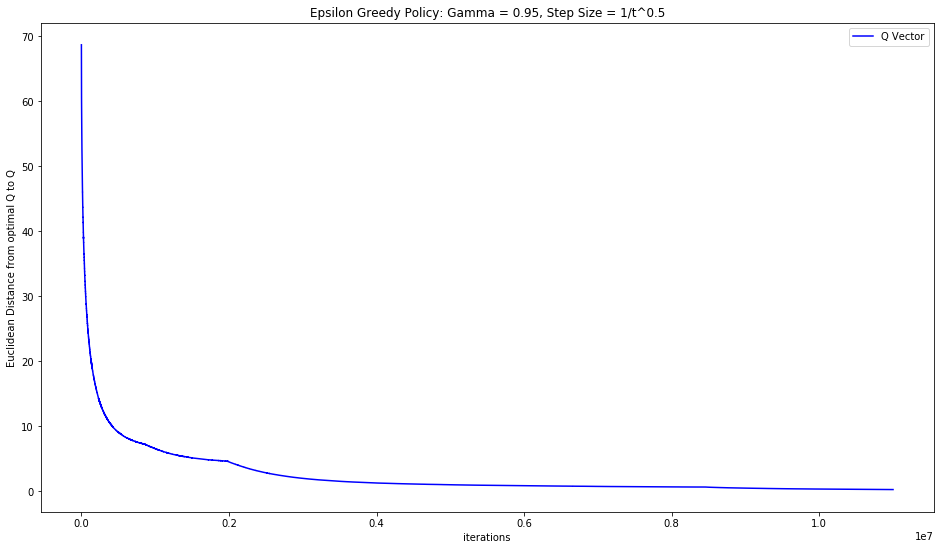

In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
import mdptoolbox.example
import numpy as np
import sys
import time
import time
import timeit
import warnings
warnings.filterwarnings('ignore')
'''
Class MarkovDP contains the following attributes:
1)Number of states  : s
2)Number of actions : a
3)State Space
4)Action Space
5)Transition probability matrix of size (a,s,s)
6)Reward matrix (a,s,s)
'''
class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        #print(rewards)
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.transitions, self.rewards         = mdptoolbox.example.rand(self.num_state,self.num_action)
        self.rewards                           = np.random.rand(self.num_action, self.num_state) #   ( self.num_state,self.num_state)

        
#having a min epsilon of 0.1 makes sure that no matter what there is some exploration so that if the epsilon decays too fast the enviornment is not dependent on its previous knowledge
class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 11000000, max_steps = 1,min_alpha=0.0, min_epsilon= 0.1, epsilon = 1.00, gamma = 0.95, decay = 25, solved=False):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        #self.states = MarkovDP.states
        #self.actions = MarkovDP.actions
        self.decay = decay  #works for most numbers between 5 and 35
        self.env = env #gym.make('CartPole-v0')
        self.QTable = np.ones((env.num_state, env.num_action))
        self.zeros = np.full((10,3), 0)
        self.QFunction = np.array([[13.23176522, 13.33925622, 14.05469772], [13.52671959, 13.1224803,  13.22367197], [13.30159516, 13.86810447, 13.51346527], [13.66552722, 13.47151662, 13.23704243], [14.00228974, 13.41027839, 13.44004462], [13.42221627, 13.84567785, 13.56730379], [13.17987508, 13.49701082, 13.59308849], [13.24370111, 13.86450877, 13.89669707], [13.86681663, 13.87073118, 13.73493382], [13.24989143, 13.5198381,  13.37349781]])        
        
    def action(self, state, epsilon):
        ''' choose an action using the epsilon policy '''
        if np.random.random() <= epsilon:
            #print(self.env.actions)
            action = random.choice(self.env.actions)
            action = list(self.env.actions).index(action)
        else:
            action = np.argmax(self.QTable[state])  # exploitation
        return action

    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
    def learning(self):
        rewards = []
        alphaList = []
        epsilonList = []
        QList = []
        state = np.random.randint(0, self.env.num_state)
        tt=0
        r = 0
        q = 0
        for e in range(self.max_episodes):  
            if e % 1100000 == 0:
                print(e)
            epsilon = self.decay_epsilon() #e)
            step_size = self.decay_step_size(e)
            action = self.action(state, epsilon)
            transitionVector = self.env.transitions[action][state]
            new_state = random.choices(population=self.env.states, weights=list(transitionVector))
            new_state = new_state[0]
            reward = self.env.rewards[action][state]
            self.Q_Update(state, action, reward, new_state, step_size)
            state = new_state
            QList.append(np.linalg.norm(self.QTable - self.QFunction))
            alphaList.append(step_size)
            epsilonList.append(epsilon)
            mean_rewards =  np.mean(rewards)
        print(self.QTable)
        return alphaList, epsilonList, QList
    

if __name__ == '__main__':
    ''' Run main program. '''
    start_time = time.time()
    env = MarkovDP(10,3)
    env.initialize_mdp()
    solve = Qlearning(env)#MarkovDP)
    alpha, epsilon, QList = solve.learning()
    print(min(QList))
    print("--- %s seconds ---" % (time.time() - start_time))
    fig = plt.figure(figsize=(16,9))
    """ax1 = fig.add_subplot(311)
    ax1.plot(epsilon,  # epsilon_hist,
             color='b',
             label='Epsilon')
    ax1.set(title='Epsilon Plot',
            ylabel='Epsilon',
            xlabel='episodes')"""
    ax2 = fig.add_subplot(111)
    ax2.plot(QList,  # epsilon_hist,
             color='b',
             label='Q Vector')
    ax2.set(title='Epsilon Greedy Policy: Gamma = 0.95, Step Size = 1/t^0.5', 
            ylabel='Euclidean Distance from optimal Q to Q',
            xlabel='iterations')
    """ax3 = fig.add_subplot(313)
    ax3.plot(rewards,  # epsilon_hist,
             color='b',
             label='rewards')
    ax3.set(title='10x3 MDP',
            ylabel='Rewards',
            xlabel='episodes')"""
    fig.subplots_adjust(hspace=0.7)
    #ax1.legend(loc='best')
    ax2.legend(loc='best')
    #ax3.legend(loc='best')

    plt.show()

In [ ]:
takes over 10 million iterations to converge. 

### BP

0
600000
1200000
1800000
2400000
3000000
3600000
4200000
4800000
5400000
[[13.23091884 13.34008914 14.05098556]
 [13.52885435 13.1196221  13.22185203]
 [13.30137837 13.87046811 13.51363422]
 [13.66156716 13.46956953 13.23820696]
 [13.999054   13.41150922 13.43787366]
 [13.42164926 13.84565496 13.56600773]
 [13.17520096 13.4982211  13.59494952]
 [13.24687312 13.86263668 13.89840446]
 [13.86856751 13.86887492 13.73400812]
 [13.25086987 13.51914075 13.37111903]]
0.007461194567282143


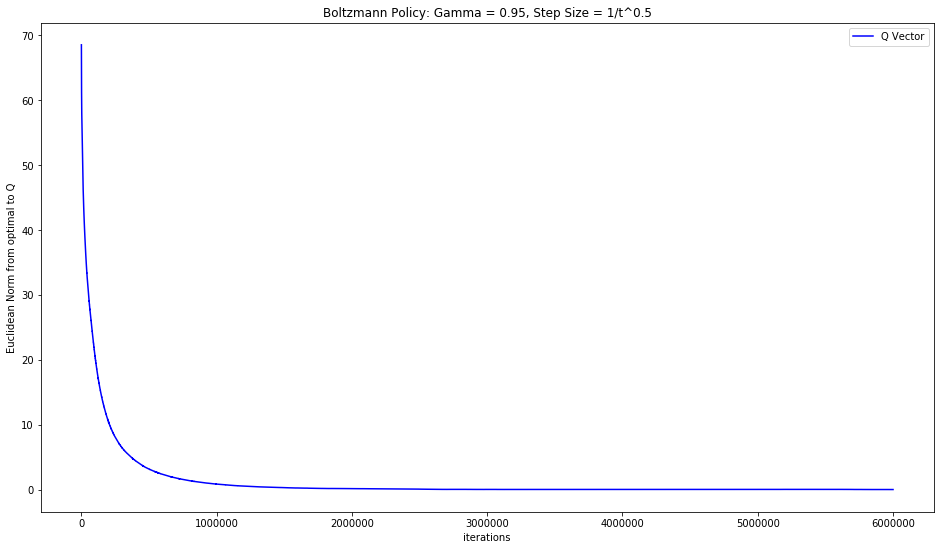

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
import mdptoolbox.example
import numpy as np
import sys
import time
import timeit
import warnings
warnings.filterwarnings('ignore')
'''
Class MarkovDP contains the following attributes:
1)Number of states  : s
2)Number of actions : a
3)State Space
4)Action Space
5)Transition probability matrix of size (a,s,s)
6)Reward matrix (a,s,s)
'''
class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.transitions, self.rewards         = mdptoolbox.example.rand(self.num_state,self.num_action)
        #print(self.transitions)
        self.rewards                           = np.random.rand(self.num_action, self.num_state) #   ( self.num_state,self.num_state)        #print(self.rewards)

        
class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 6000000, max_steps = 1, min_epsilon=0.1, epsilon = 1.0, gamma = 0.95):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_epsilon = min_epsilon 
        self.gamma = gamma
        self.env = env #gym.make('CartPole-v0')
        self.QTable = np.ones((env.num_state, env.num_action))
        self.QFunction = np.array([[13.23176522, 13.33925622, 14.05469772], [13.52671959, 13.1224803,  13.22367197], [13.30159516, 13.86810447, 13.51346527], [13.66552722, 13.47151662, 13.23704243], [14.00228974, 13.41027839, 13.44004462], [13.42221627, 13.84567785, 13.56730379], [13.17987508, 13.49701082, 13.59308849], [13.24370111, 13.86450877, 13.89669707], [13.86681663, 13.87073118, 13.73493382], [13.24989143, 13.5198381,  13.37349781]])       
        self.tau = 100000    # tau --> 0 pure exploitation tau --> infinity pure exploration
        self.tau_decay = True
        self.decay_factor_tau = 1.5 
        self.zeros = np.full((10,3), 0)
    
    def Boltzmann(self, state, tau):
        qList = self.QTable[state] #moves = self.q_matrix[pos_index]
        self.actions = [i for i in range(0, self.env.num_action)]
        # Circumvent math issues with temperature actually being 0
        if self.tau > 0.0:
            #print(self.tau)
            # Compute action probabilities using tau; when
            # tau is high, we're treating values of very different
            # Q-values as more equally choosable
            action_probs_numes = []
            denom = 0
            for q in qList:
                val = math.exp(q / self.tau)
                action_probs_numes.append(val)
                denom += val  # summation of the values
            action_probs = []
            for x in action_probs_numes:
                probs = x / denom 
                action_probs.append(probs)    
            # Pick random move, in which moves with higher probability are
            # more likely to be chosen, but it is obviously not guaranteed
            prob_sum = 0
            #action = action_probs.index(max(action_probs))
            #print(action)
            #action = np.argmax(action_probs)
            action = random.choices(self.actions, weights=action_probs, k=1)[0] # the weights give a weight to correspond 
            #for each action , and then chooses a random action with each action weighted by it prob. and then chooses
            #I attemped using the action for the max probabilty but it only returned one action each time
        else:
            # Here, we're totally cold; meaning, we're just exploiting
            action = np.argmax(self.QTable[state])
        return action
    
    
    def action_policy(self, state, policy):
        return policy[state]

    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        # self.QTable[old_state][action] += alpha * (reward + self.gamma * np.max(self.Q[state_new]) - self.Q[state_old][action])
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
    
    def decay_tau(self, t):          
        if self.tau_decay is True:
            #print(t)
            new_tau = self.tau - self.decay_factor_tau
        if new_tau < 1.0:
            self.tau = 1.0
        else:
            self.tau = new_tau
        return new_tau 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
    def learning(self):
        rewards = []
        alphaList = []
        epsilonList = []
        QList = []
        tt=0
        state = np.random.randint(0,9) #self.env.reset()
        r=0
        q=0
        for e in range(self.max_episodes):  
            if e % 600000 == 0:
                print(e)
            epsilon = self.decay_tau(e)
            step_size = self.decay_step_size(e)
            tt+=1
            action = self.Boltzmann(state, epsilon)
            transitionVector = self.env.transitions[action][state]
            new_state = random.choices(population=self.env.states, weights=list(transitionVector))
            new_state = new_state[0]
            reward = self.env.rewards[action][state]
            self.Q_Update(state, action, reward, new_state, step_size)
            state = new_state
            i = 0
            QList.append(np.linalg.norm(self.QTable-self.QFunction))
            alphaList.append(step_size)
            epsilonList.append(epsilon)
            mean_rewards =  np.mean(rewards)
        print(self.QTable)
        return rewards, alphaList, epsilonList, QList
    
if __name__ == '__main__':
    ''' Run main program. '''
    env = MarkovDP(10,3)
    env.initialize_mdp()
    solve = Qlearning(env)#MarkovDP)
    rewards, alpha, epsilon, QList = solve.learning()
    print(min(QList))
    fig = plt.figure(figsize=(16,9))
    """ax1 = fig.add_subplot(311)
    ax1.plot(epsilon,  # epsilon_hist,
             color='b',
             label='Tau')
    ax1.set(title='Tau Plot',
            ylabel='Tau',
            xlabel='episodes')"""
    ax2 = fig.add_subplot(111)
    ax2.plot(QList,  # epsilon_hist,
             color='b',
             label='Q Vector')
    ax2.set(title='Boltzmann Policy: Gamma = 0.95, Step Size = 1/t^0.5',
            ylabel='Euclidean Norm from optimal to Q',
            xlabel='iterations')
    """ax3 = fig.add_subplot(313)
    ax3.plot(rewards,  # epsilon_hist,
             color='b',
             label='rewards')
    ax3.set(title='10x3 MDP',
            ylabel='Rewards',
            xlabel='episodes')
    fig.subplots_adjust(hspace=0.7)
    ax1.legend(loc='best')"""
    ax2.legend(loc='best')
    #ax3.legend(loc='best')

    plt.show()

In [ ]:
converges around 1 million iterations

### UP

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
[[13.18732237 13.29823951 14.00633199]
 [13.48282376 13.07814718 13.17957588]
 [13.26081076 13.82855375 13.46720294]
 [13.62283919 13.42190819 13.19209711]
 [13.96148064 13.37096828 13.39991726]
 [13.38324008 13.8028397  13.52599301]
 [13.14033045 13.45037544 13.55494168]
 [13.20617182 13.82756899 13.85481588]
 [13.82415979 13.821825   13.68999938]
 [13.20477137 13.4780972  13.32894976]]
0.23439608257151434
--- 149.3738570213318 seconds ---


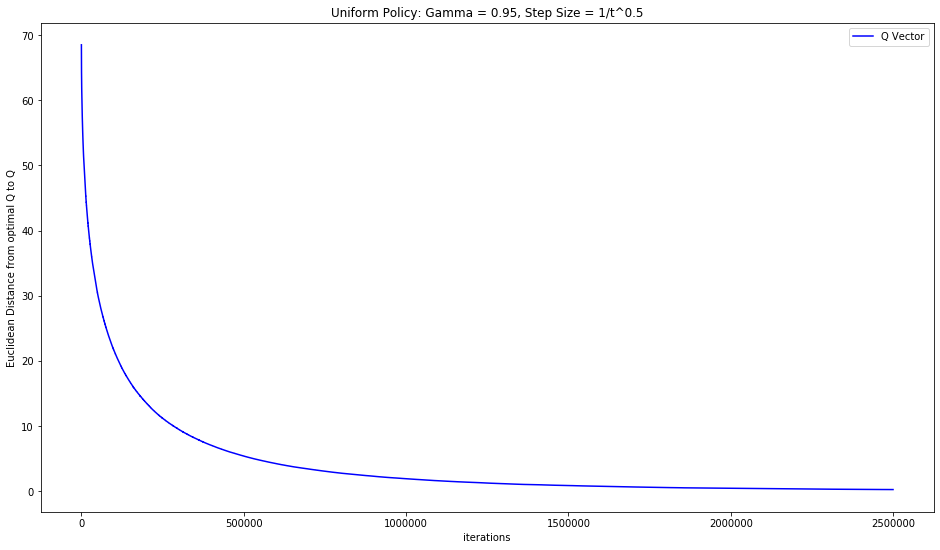

In [24]:
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
import mdptoolbox.example
import numpy as np
import sys
import time
import time
import timeit
import warnings
warnings.filterwarnings('ignore')
'''
Class MarkovDP contains the following attributes:
1)Number of states  : s
2)Number of actions : a
3)State Space
4)Action Space
5)Transition probability matrix of size (a,s,s)
6)Reward matrix (a,s,s)
'''
class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        #print(rewards)
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.transitions, self.rewards         = mdptoolbox.example.rand(self.num_state,self.num_action)
        self.rewards                           = np.random.rand(self.num_action, self.num_state) #   ( self.num_state,self.num_state)
        
class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 2500000, max_steps = 1, min_epsilon= 0.1, epsilon = 1.00, gamma = 0.95):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.gamma = gamma
        self.env = env #gym.make('CartPole-v0')
        self.QTable = np.ones((env.num_state, env.num_action))
        self.zeros = np.full((10,3), 0)
        self.QFunction = np.array([[13.23176522, 13.33925622, 14.05469772], [13.52671959, 13.1224803,  13.22367197], [13.30159516, 13.86810447, 13.51346527], [13.66552722, 13.47151662, 13.23704243], [14.00228974, 13.41027839, 13.44004462], [13.42221627, 13.84567785, 13.56730379], [13.17987508, 13.49701082, 13.59308849], [13.24370111, 13.86450877, 13.89669707], [13.86681663, 13.87073118, 13.73493382], [13.24989143, 13.5198381,  13.37349781]])        
        
    def action(self, state, epsilon):
        ''' choose an action using the epsilon policy '''
        action = random.choice(self.env.actions)
        action = list(self.env.actions).index(action)
        return action

    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
#1-ln(time unit/decay)
    def learning(self):
        rewards = []
        alphaList = []
        epsilonList = []
        QList = []
        state = np.random.randint(0, self.env.num_state)
        tt=0
        r = 0
        q = 0
        for e in range(self.max_episodes):  
            if e % 100000 == 0:
                print(e)
            epsilon = self.decay_epsilon() #e)
            step_size = self.decay_step_size(e)
            action = self.action(state, epsilon)
            transitionVector = self.env.transitions[action][state]
            new_state = random.choices(population=self.env.states, weights=list(transitionVector))
            new_state = new_state[0]
            reward = self.env.rewards[action][state]
            self.Q_Update(state, action, reward, new_state, step_size)
            state = new_state
            QList.append(np.linalg.norm(self.QTable - self.QFunction))
            alphaList.append(step_size)
            epsilonList.append(epsilon)
            mean_rewards =  np.mean(rewards)
        print(self.QTable)
        return alphaList, epsilonList, QList
    

if __name__ == '__main__':
    ''' Run main program. '''
    start_time = time.time()
    env = MarkovDP(10,3)
    env.initialize_mdp()
    solve = Qlearning(env)#MarkovDP)
    alpha, epsilon, QList = solve.learning()
    print(min(QList))
    print("--- %s seconds ---" % (time.time() - start_time))
    fig = plt.figure(figsize=(16,9))
    """ax1 = fig.add_subplot(311)
    ax1.plot(epsilon,  # epsilon_hist,
             color='b',
             label='Epsilon')
    ax1.set(title='Epsilon Plot',
            ylabel='Epsilon',
            xlabel='episodes')"""
    ax2 = fig.add_subplot(111)
    ax2.plot(QList,  # epsilon_hist,
             color='b',
             label='Q Vector')
    ax2.set(title='Uniform Policy: Gamma = 0.95, Step Size = 1/t^0.5', 
            ylabel='Euclidean Distance from optimal Q to Q',
            xlabel='iterations')
    """ax3 = fig.add_subplot(313)
    ax3.plot(rewards,  # epsilon_hist,
             color='b',
             label='rewards')
    ax3.set(title='10x3 MDP',
            ylabel='Rewards',
            xlabel='episodes')"""
    fig.subplots_adjust(hspace=0.7)
    #ax1.legend(loc='best')
    ax2.legend(loc='best')
    #ax3.legend(loc='best')

    plt.show()

In [ ]:
converges after 2 million episodes

# Gamma = 0.01

In [ ]:
self.QFunction = np.array([[0.0516919,  0.23448307, 0.98028183], [0.34115492, 0.07484244, 0.16857844], [0.10833031, 0.71321889, 0.29879134], [0.4836024,  0.40128608, 0.18570717], [0.82776499, 0.31700179, 0.35226662], [0.30520302, 0.72563804, 0.48670557], [0.15598485, 0.34338171, 0.52818049], [0.33554884, 0.73505946, 0.859736  ], [0.82077784, 0.82147296, 0.89200693], [0.14739014, 0.22594049, 0.22736024]])